In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
exp_1 = pd.read_excel("EXP-00001-Master.xlsx")

In [3]:
exp_2 = pd.read_excel('EXP-00002-Master.xlsx')

In [5]:
exp_3 = pd.read_excel('EXP-00003-Master.xlsx')

In [6]:
exp_4 = pd.read_excel('EXP-00004-Master.xlsx')
exp_5 = pd.read_excel('EXP-00004-Master.xlsx')

In [7]:

exp_1.drop(index=0, inplace=True)
exp_2.drop(index=0, inplace=True)
exp_3.drop(index=0, inplace=True)
exp_4.drop(index = 0, inplace = True)
exp_5.drop(index = 0, inplace= True)

exp_1.reset_index(drop=True, inplace=True)
exp_2.reset_index(drop=True, inplace=True)
exp_3.reset_index(drop=True, inplace=True)
exp_4.reset_index(drop=True, inplace=True)
exp_5.reset_index(drop=True, inplace=True)

['Id', 'Img Id', 'Da', 'Dp', 'FWidth', 'FLength', 'FThickness',
       'ELength', 'EThickness', 'EWidth', 'Volume', 'Area', 'Perimeter',
       'CHull  Area', 'CHull Perimeter', 'Sphericity', 'L/T Ratio',
       'T/L Aspect Ratio', 'Compactness', 'Roundness', 'Ellipse Ratio',
       'Circularity', 'Solidity', 'Concavity', 'Convexity', 'Extent', 'hash',
       'Surface Area', 'Filter0', 'Filter1', 'Filter2', 'Filter3', 'Filter4',
       'Filter5', 'Filter6', 'L/W Ratio', 'W/L Ratio', 'W/T Ratio',
       'T/W Ratio', 'CHull Surface Area', 'Sieve', 'Ellipticity',
       'Fiber Length', 'Fiber Width'],

In [ ]:
# exp_1.groupby(['Id'])['Id'].count()
# exp_1[exp_1['Id'] == 1]
# #Dropping Id column since it's not relevant

# exp_1.groupby(['Filter0']).count()
# exp_2.groupby(['Filter0']).count()
# exp_3.groupby(['Filter0']).count()

# exp_1.groupby(['Filter1']).count()
# exp_2.groupby(['Filter1']).count()
# exp_3.groupby(['Filter1']).count()

# exp_1.groupby(['Filter2']).count()
# exp_2.groupby(['Filter2']).count()
# exp_3.groupby(['Filter2']).count()

# exp_1.groupby(['Filter3']).count()
# exp_2.groupby(['Filter3']).count()
# exp_3.groupby(['Filter3']).count()


# exp_1.groupby(['Filter4']).count()
# exp_2.groupby(['Filter4']).count()
# exp_3.groupby(['Filter4']).count()

# exp_1.groupby(['Filter5']).count()
# exp_2.groupby(['Filter5']).count()
# exp_3.groupby(['Filter5']).count()

# exp_1.groupby(['Filter6']).count()
# exp_2.groupby(['Filter6']).count()
# exp_3.groupby(['Filter6']).count()

#All filters contain reject for all filter columns, they are getting dropped

# exp_1.groupby(['hash']).count()
# exp_2.groupby(['hash']).count()
# exp_3.groupby(['hash']).count()
# Dropping hash, all values are 0

#Img Id doesn't seem to provide good values

exp_5.columns

Index(['Id', 'Img Id', 'Da', 'Dp', 'FWidth', 'FLength', 'FThickness',
       'ELength', 'EThickness', 'EWidth', 'Volume', 'Area', 'Perimeter',
       'CHull  Area', 'CHull Perimeter', 'Sphericity', 'L/T Ratio',
       'T/L Aspect Ratio', 'Compactness', 'Roundness', 'Ellipse Ratio',
       'Circularity', 'Solidity', 'Concavity', 'Convexity', 'Extent', 'hash',
       'Transparency', 'Curvature', 'Surface Area', 'Filter0', 'Filter1',
       'Filter2', 'Filter3', 'Filter4', 'Filter5', 'Filter6', 'L/W Ratio',
       'W/L Ratio', 'W/T Ratio', 'T/W Ratio', 'CHull Surface Area', 'Sieve',
       'Angularity', 'Ellipticity', 'Fiber Length', 'Fiber Width'],
      dtype='object')

In [8]:
not_included = ['Id', 'Filter0','Filter1', 'Filter2','Filter3', 'Filter4', 'Filter5', 'Filter6', 'hash', 'Img Id', 'Curvature', 'Transparency', 'Angularity']
filtered = [x for x in exp_1.columns if x not in not_included]



exp_1_filtered = exp_1[filtered]
exp_2_filtered = exp_2[filtered]
exp_3_filtered = exp_3[filtered]
exp_4_filtered = exp_4[filtered]
exp_5_filtered = exp_5[filtered]

exp_1_filtered['Production Stage'] = 0
exp_2_filtered['Production Stage'] = 1
exp_3_filtered['Production Stage'] = 2
exp_4_filtered['Production Stage'] = 3
exp_5_filtered['Production Stage'] = 4

/var/folders/hx/pqx1jktn7hs7y0_68_bzk__m0000gn/T/ipykernel_14940/4217849102.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_1_filtered['Production Stage'] = 0
/var/folders/hx/pqx1jktn7hs7y0_68_bzk__m0000gn/T/ipykernel_14940/4217849102.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_2_filtered['Production Stage'] = 1
/var/folders/hx/pqx1jktn7hs7y0_68_bzk__m0000gn/T/ipykernel_14940/4217849102.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [9]:
r1, c1 = exp_1_filtered.shape
r2, c2 = exp_2_filtered.shape
r3, c3  = exp_3_filtered.shape
data = exp_1_filtered.merge(exp_2_filtered, how= 'outer')
data
data = data.merge(exp_3_filtered, how = 'outer')
data = data.merge(exp_4_filtered, how = 'outer')
data = data.merge(exp_5_filtered, how='outer')

/Users/rodrigo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/Users/rodrigo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/Users/rodrigo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/Users/rodrigo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, 

<AxesSubplot:>

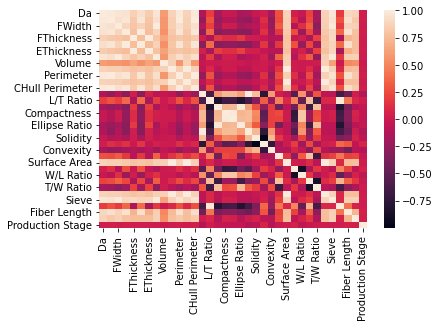

In [11]:
import seaborn as sns

for x in data.columns: 
    data[x] = pd.to_numeric(data[x])

sns.heatmap(data.corr())

In [12]:
s =data.corr()
the_corr = s['Production Stage']

In [ ]:
the_corr

Da                    0.025562
Dp                    0.039007
FWidth                0.013860
FLength               0.034796
FThickness            0.019973
ELength               0.030728
EThickness            0.016485
EWidth                0.010461
Volume               -0.001783
Area                  0.010128
Perimeter             0.039007
CHull  Area           0.010623
CHull Perimeter       0.034216
Sphericity           -0.120339
L/T Ratio             0.020885
T/L Aspect Ratio     -0.030054
Compactness          -0.046134
Roundness            -0.049205
Ellipse Ratio        -0.028785
Circularity          -0.121177
Solidity             -0.069948
Concavity             0.069948
Convexity            -0.110819
Extent               -0.015434
Surface Area          0.010128
L/W Ratio             0.053797
W/L Ratio            -0.056822
W/T Ratio            -0.013822
T/W Ratio             0.007395
CHull Surface Area    0.010623
Sieve                 0.016452
Ellipticity           0.021060
Fiber Le

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data[filtered],
    data['Production Stage'],
    test_size=0.2,
    stratify= data['Production Stage'],
    random_state=44)

y_train.groupby(y_train).count()
y_test.groupby(y_test).count()



Production Stage
0    9714
1    9938
2    2964
3    7336
4    7336
Name: Production Stage, dtype: int64

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

In [110]:
stage_0 = [1 if x ==0 else 0 for x in data['Production Stage'] ]
stage_1 = [1 if x ==1 else 0 for x in data['Production Stage']]
stage_2 = [1 if x ==2 else 0 for x in data['Production Stage']]
stage_3 = [1 if x ==3 else 0 for x in data['Production Stage']]
stage_4 = [1 if x ==4 else 0 for x in data['Production Stage']]

the_stages = ['stage_0', 'stage_1', 'stage_2', 'stage_3', 'stage_4']

In [107]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(len(filtered),)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = tf.nn.softmax)])


# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, input_shape=(len(filtered),)),
#     tf.keras.layers.Dense(64, activation = 'relu'),
#     tf.keras.layers.Dense(5, activation = tf.nn.softmax)])

In [108]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy'],
)

In [99]:
print(X_train)

           Da     Dp  FWidth  FLength  FThickness  ELength  EThickness  \
147410  1.481  2.323   1.297    3.584       0.383    3.509       0.343   
1534    0.819  1.002   0.743    1.156       0.550    1.094       0.515   
101118  0.633  0.878   0.798    1.055       0.244    1.031       0.217   
125770  0.468  0.766   0.672    1.467       0.139    1.350       0.127   
162873  0.648  0.854   0.730    1.124       0.322    0.998       0.307   
...       ...    ...     ...      ...         ...      ...         ...   
35953   0.263  0.335   0.245    0.556       0.162    0.563       0.153   
27112   0.397  0.595   0.325    1.263       0.202    1.352       0.194   
168268  0.485  0.637   0.645    0.919       0.164    0.832       0.148   
7468    0.575  0.650   0.696    0.951       0.275    0.868       0.285   
36502   0.409  0.505   0.451    0.796       0.159    0.825       0.139   

        EWidth  Volume   Area  ...  Surface Area  L/W Ratio  W/L Ratio  \
147410   1.212   0.932  1.723  ...   

In [100]:
print(y_train)

147410    3
1534      0
101118    2
125770    3
162873    4
         ..
35953     0
27112     0
168268    4
7468      0
36502     0
Name: Production Stage, Length: 149150, dtype: int64


In [106]:
y_train.values.shape

(149150,)

In [109]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(
    X_train,
    y_train.values,
    epochs=50,
    callbacks=[callback]
)

Epoch 1/50
4661/4661 [==============================] - 19s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2665
Epoch 2/50
4661/4661 [==============================] - 16s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2665
Epoch 3/50
4661/4661 [==============================] - 21s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2665
Epoch 4/50
1012/4661 [=====>........................] - ETA: 25s - loss: 0.0000e+00 - accuracy: 0.2687

KeyboardInterrupt: 